In [1]:
"""
DISCRIPTION GOAL OF THIS PROJECT 

This project  researches the Prediction of Solar Radiation Harvesting.
The amount of radiation collected on a particular day determines wether there is 
sufficient energy to power up Photovoltaic cells. It is there necessary to obtain
supporting data before undertaking such a project. This study aims at providing proof 
that task at hand is achievable.

I obtained data for the project from kaggle data science website
I have be looked at the raw data, analysed and determed the steps necessary to 
organize it into easily usable format.

This is a regression task.
I therefore designed neural network using MPLRegressor model obtained from Sklearn 
website.
In addition, I obtained a Robustscaler from the same website to scale the data so as to
account for the skewness in the various categorical variables of the data.
The final goal has been achieved by use of a 9 layered  neural network. 

Several necessary adjustements to improve the model have been done by twinking different
varaibles. And I believe that at this point the model is performing at a reasonable 
decent score of 70%
"""

'\nDISCRIPTION GOAL OF THIS PROJECT \n\nThis project  researches the Prediction of Solar Radiation Harvesting.\nThe amount of radiation collected on a particular day determines wether there is \nsufficient energy to power up Photovoltaic cells. It is there necessary to obtain\nsupporting data before undertaking such a project. This study aims at providing proof \nthat task at hand is achievable.\n\nI obtained data for the project from kaggle data science website\nI have be looked at the raw data, analysed and determed the steps necessary to \norganize it into easily usable format.\n\nThis is a regression task.\nI therefore designed neural network using MPLRegressor model obtained from Sklearn \nwebsite.\nIn addition, I obtained a Robustscaler from the same website to scale the data so as to\naccount for the skewness in the various categorical variables of the data.\nThe final goal has been achieved by use of a 9 layered  neural network. \n\nSeveral necessary adjustements to improve the

In [2]:
"""
1. Importing The Data set.
2.Transforming the data set into python manuplate format.
"""
import numpy as np
import re
import pandas as pd
def loaddatafunc():
    df = pd.read_csv('/Users/geraldbamundaga/Documents/Python3402/python3402/Data3402_2021_Fall_Solutions1.geraldbamundaga/Labs/lab.7/SolarPrediction.csv')
    return df

In [3]:
df=loaddatafunc()
len(df)

32686

In [4]:
"""
FEATURE ENGINEERING:
At this step the data is converted into a different format that will be more useful in terms
of data manipulation and visualization. For example new columns for time, day, month and 
year are added.
I have used regular expression to achieve this format. Below is the is code and new 
transformed data set.
"""

'\nFEATURE ENGINEERING:\nAt this step the data is converted into a different format that will be more useful in terms\nof data manipulation and visualization. For example new columns for time, day, month and \nyear are added.\nI have used regular expression to achieve this format. Below is the is code and new \ntransformed data set.\n'

In [5]:

loaddatafunc()
df['monthOfyear'] = df['Data'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['dayOfmonth'] = df['Data'].apply(lambda x : re.search(r'\d{2}', x).group(0)).astype(int)
df['year'] = df['Data'].apply(lambda x : re.search(r'\d{4}', x).group(0)).astype(int)

In [6]:
df['hourOfday'] = df['Time'].apply(lambda x : re.search(r'^\d{2}', x).group(0)).astype(int)
df['minuteOfhour'] = df['Time'].apply(lambda x : re.search(r'(?<=\:)\d{2}', x).group(0)).astype(int)
df['secondsOminute'] = df['Time'].apply(lambda x : re.search(r'\d{2}$', x).group(0)).astype(int)

In [7]:
df['Sunrisehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d{2,}', x).group(0)).astype(int)
df['Sunriseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d{2}', x).group(0)).astype(int)

df['Sunsethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d{2}', x).group(0)).astype(int)
df['Sunsetminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d{2}', x).group(0)).astype(int)

In [8]:
df. loc[df['monthOfyear'] ==9]

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,...,monthOfyear,dayOfmonth,year,hourOfday,minuteOfhour,secondsOminute,Sunrisehour,Sunriseminuter,Sunsethour,Sunsetminute
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,...,9,29,2016,23,55,26,6,13,18,13
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,...,9,29,2016,23,50,23,6,13,18,13
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,...,9,29,2016,23,45,26,6,13,18,13
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,...,9,29,2016,23,40,21,6,13,18,13
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,...,9,29,2016,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7412,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,...,9,20,2016,0,30,9,6,7,18,38
7413,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,...,9,20,2016,0,25,5,6,7,18,38
7414,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,...,9,20,2016,0,20,6,6,7,18,38
7415,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,...,9,20,2016,0,5,10,6,7,18,38


In [9]:
"""Below are the Radiation value between 10:00 and 17:00pm. During this time period you get the most 
sun: The are save in the variable dataAdjusted. I'm seperating data in this format 
because this range of time of the day is optimal energy production since the
"""

"Below are the Radiation value between 10:00 and 17:00pm. During this time period you get the most \nsun: The are save in the variable dataAdjusted. I'm seperating data in this format \nbecause this range of time of the day is optimal energy production since the\n"

In [10]:

dataAdjusted=df.loc[(df['hourOfday'] >10 )&(df['hourOfday']  <17) & (df['Radiation'] > 150)]

In [11]:
dataAdjusted

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,...,monthOfyear,dayOfmonth,year,hourOfday,minuteOfhour,secondsOminute,Sunrisehour,Sunriseminuter,Sunsethour,Sunsetminute
84,1475204125,9/29/2016 12:00:00 AM,16:55:25,300.94,58,30.43,55,45.88,3.37,06:13:00,...,9,29,2016,16,55,25,6,13,18,13
85,1475203822,9/29/2016 12:00:00 AM,16:50:22,322.71,58,30.43,56,94.24,7.87,06:13:00,...,9,29,2016,16,50,22,6,13,18,13
86,1475203538,9/29/2016 12:00:00 AM,16:45:38,346.59,58,30.43,50,81.57,6.75,06:13:00,...,9,29,2016,16,45,38,6,13,18,13
87,1475203220,9/29/2016 12:00:00 AM,16:40:20,364.18,58,30.43,49,351.03,7.87,06:13:00,...,9,29,2016,16,40,20,6,13,18,13
88,1475202941,9/29/2016 12:00:00 AM,16:35:41,368.35,58,30.43,51,78.81,5.62,06:13:00,...,9,29,2016,16,35,41,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32528,1480633503,12/1/2016 12:00:00 AM,13:05:03,384.66,45,30.39,93,47.18,10.12,06:41:00,...,12,12,2016,13,5,3,6,41,17,42
32529,1480633201,12/1/2016 12:00:00 AM,13:00:01,269.61,45,30.39,93,355.33,14.62,06:41:00,...,12,12,2016,13,0,1,6,41,17,42
32530,1480632903,12/1/2016 12:00:00 AM,12:55:03,239.52,45,30.39,93,68.40,4.50,06:41:00,...,12,12,2016,12,55,3,6,41,17,42
32533,1480632003,12/1/2016 12:00:00 AM,12:40:03,168.63,45,30.40,93,111.19,15.75,06:41:00,...,12,12,2016,12,40,3,6,41,17,42


In [12]:
#df['Time']=pd.to_timedelta(df['Time']).map(lambda x:x.total_seconds())
#df['TimeSunRise']=pd.to_timedelta(df['TimeSunRise']).map(lambda x:x.total_seconds())
#df['TimeSunSet']=pd.to_timedelta(df['TimeSunRise']).map(lambda x:x.total_seconds())
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2
#sns.distplot(x = 'monthOfyear',y ='Radiation',data=df)

In [13]:
"""
VISUALIZATION STAGE 1
This is at stage  the data is visualized. So that we can look at the distribution.
If it is normally distributed then I can just proceede without scaling the data 
otherwise the data will have to be normalized in order to get unbiased results
"""

'\nVISUALIZATION STAGE 1\nThis is at stage  the data is visualized. So that we can look at the distribution.\nIf it is normally distributed then I can just proceede without scaling the data \notherwise the data will have to be normalized in order to get unbiased results\n'

Text(0.5, 1.0, 'Day Of The Month')

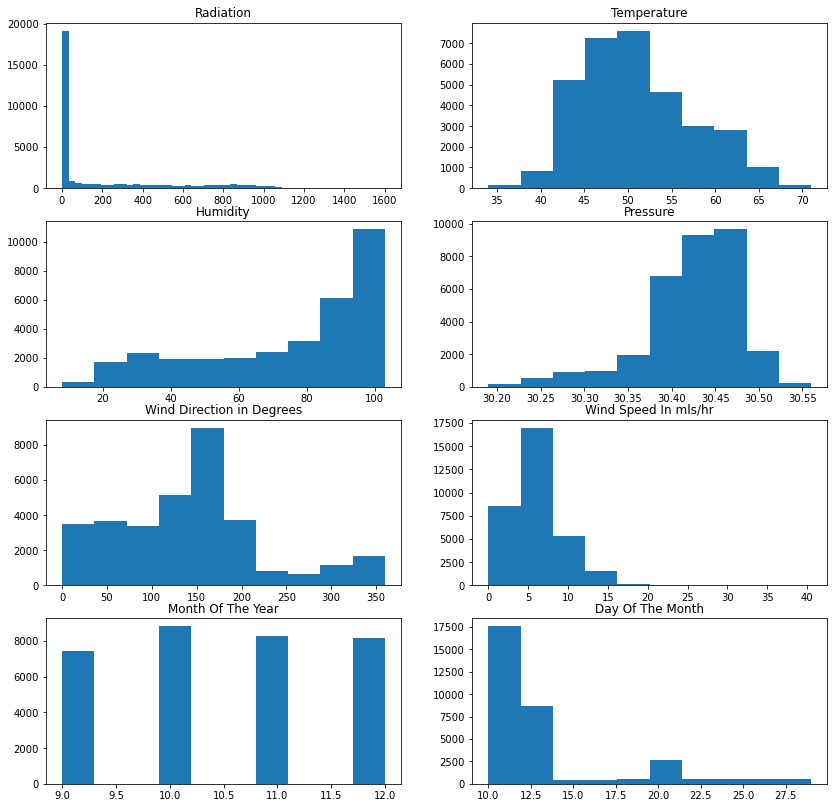

In [14]:
import numpy as np
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(14,14))
rad=np.array(df['Radiation'])
temp=np.array(df['Temperature'])
humd=np.array(df['Humidity'])
press=np.array(df['Pressure'])
winddir=np.array(df['WindDirection(Degrees)'])
windsp=np.array(df['Speed'])
month=df.monthOfyear
day=df.dayOfmonth
ax1.hist(rad,bins=50)
ax1.set_title('Radiation')
ax2.hist(temp)
ax2.set_title('Temperature')
ax3.hist(humd)
ax3.set_title('Humidity')
ax4.hist(press)
ax4.set_title('Pressure')
ax5.hist(winddir)
ax5.set_title('Wind Direction in Degrees')
ax6.hist(windsp)
ax6.set_title('Wind Speed In mls/hr')
ax7.hist(month)
ax7.set_title('Month Of The Year')
ax8.hist(day)
ax8.set_title('Day Of The Month')

In [15]:
"""
As it can be seen above from plots for the data, it shows severe skewness in the data.
Radiation alone varies from 0.15 to over 1000W/m². Othe variable are no different.
The reasonable and sensible approach would be to normalize the data before I proceed 
with prediction. I believe that normalization will significatly reduce the biasness in
the results. But, before normalizing the data I will look at the second stage of 
visualization.
"""

'\nAs it can be seen above from plots for the data, it shows severe skewness in the data.\nRadiation alone varies from 0.15 to over 1000W/m². Othe variable are no different.\nThe reasonable and sensible approach would be to normalize the data before I proceed \nwith prediction. I believe that normalization will significatly reduce the biasness in\nthe results. But, before normalizing the data I will look at the second stage of \nvisualization.\n'

In [16]:
"""
At this point, it is necessary to seperate columns for the work ahead.
This is because some columns such seconds, sunrisehour e.t.c will not have an effect
on the prediction results
"""

'\nAt this point, it is necessary to seperate columns for the work ahead.\nThis is because some columns such seconds, sunrisehour e.t.c will not have an effect\non the prediction results\n'

In [17]:
import pandas as pd
df=pd.DataFrame(df[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','monthOfyear','dayOfmonth','year','hourOfday','minuteOfhour','secondsOminute','Sunrisehour','Sunriseminuter','Sunsethour','Sunsetminute']])

In [18]:
"""
VISUALIZATION STAGE 2
Now I will split the data into groups for comparisions. The visualization at this point is tothat can determine the 
provides the level of correlation between the various categorical variables
"""

'\nVISUALIZATION STAGE 2\nNow I will split the data into groups for comparisions. The visualization at this point is tothat can determine the \nprovides the level of correlation between the various categorical variables\n'

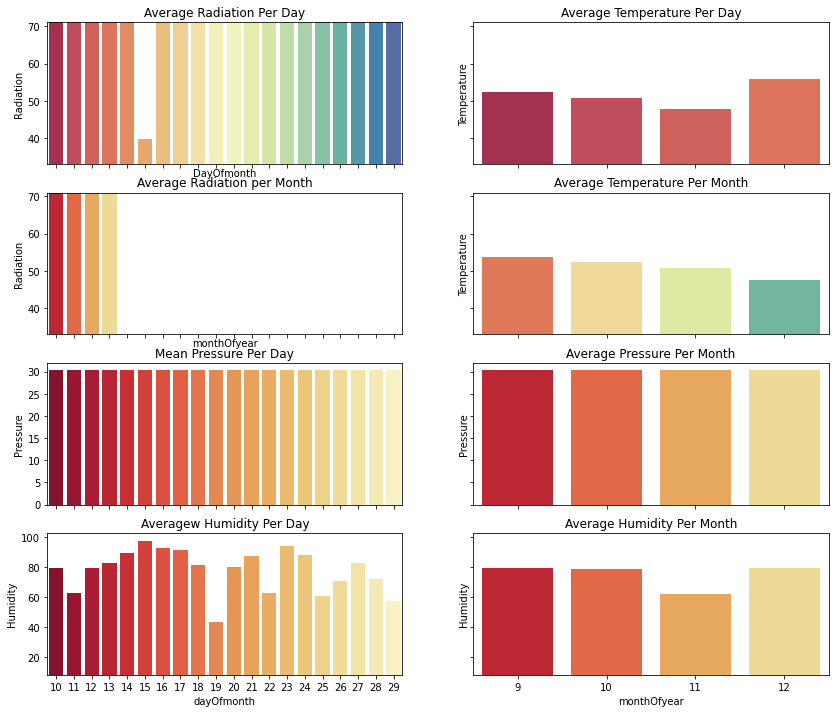

In [19]:
df1=df.groupby('monthOfyear').mean().reset_index()
df2=df.groupby('dayOfmonth').mean().reset_index()
df3=df.groupby('hourOfday').mean().reset_index()

f, ((ax1,ax3), (ax2, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax1.set_title('Average Radiation Per Day')
pal = sns.color_palette("YlOrRd_r", len(df))
rank = df2['Radiation'].argsort().argsort()
sns.barplot(x="dayOfmonth", y='Radiation', data=df2, palette='Spectral', ax=ax1)
ax1.set_xlabel('DayOfmonth')

#fig2, ax2= plt.subplots()
ax2.set_title('Average Radiation per Month')
sns.barplot(x='monthOfyear', y='Radiation', data=df1, palette="YlOrRd_r", ax=ax2)

#fig3, ax3= plt.subplots()
ax3.set_title('Average Temperature Per Day')
sns.barplot(x="dayOfmonth", y='Temperature', data=df2, palette="Spectral", ax=ax3)
ax3.set_xlabel('')
ax3.set_ylim(33,71)

ax4.set_title('Average Temperature Per Month')
sns.barplot(x="monthOfyear", y='Temperature', data=df1, palette='Spectral', ax=ax4)
ax4.set_xlabel('')
ax4.set_ylim(33,71)

ax5.set_title('Mean Pressure Per Day')
sns.barplot(x="dayOfmonth", y='Pressure', data=df2, palette='YlOrRd_r', ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Average Pressure Per Month')
sns.barplot(x="monthOfyear", y='Pressure', data=df1, palette='YlOrRd_r', ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Averagew Humidity Per Day')
sns.barplot(x="dayOfmonth", y='Humidity', data=df2, palette='YlOrRd_r', ax=ax7)
ax7.set_ylim(8,103)

ax8.set_title('Average Humidity Per Month')
sns.barplot(x="monthOfyear", y='Humidity', data=df1, palette='YlOrRd_r', ax=ax8)
ax8.set_ylim(8,103)
plt.show()

In [20]:
"""
From the plots above it clearly shows that temperature is highly correlated with 
radiation
Furthermore, with the help of the heatmap a Pearson correlation below we can obtain 
conclusive evidence that temperature has the most effection on the amount of radition
generated in a day.
"""

'\nFrom the plots above it clearly shows that temperature is highly correlated with \nradiation\nFurthermore, with the help of the heatmap a Pearson correlation below we can obtain \nconclusive evidence that temperature has the most effection on the amount of radition\ngenerated in a day.\n'

In [21]:
df=pd.DataFrame(df[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','monthOfyear','dayOfmonth']])

In [22]:
dfcorr=df.corr()

<AxesSubplot:>

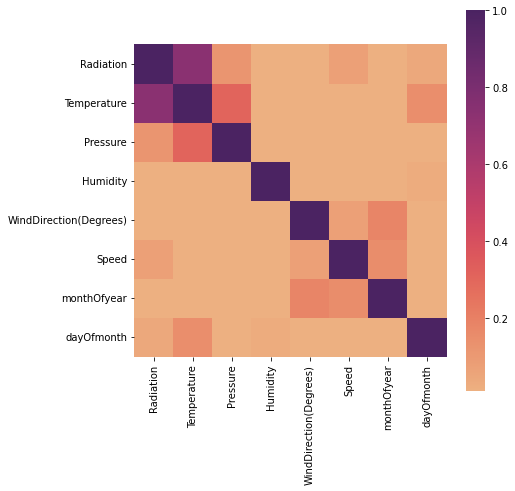

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(dfcorr, vmin=0.01, vmax=1, square=True, cmap ='flare')

In [24]:
"""
MODEL IMPLEMENTATION:
This is a discription of the process and architecture of the model that will be used to
make accurate predictions.

Artificial Neural Network model(ANN):
A Multi-Layer Perceptron(MPl). It will use a feed-forward backprogation process.

Activation Function:
Relu: Rectified Linear Unit. Very popular in deep learning models. It returns zero of 
negative inputs and returns the input value for positive inputs. It is given by the
the following equation  f(x)= max(0,x).

There two stages neural network: the learning stage and testing stage. In the learning
stage the network makes errors and learns from it by adjusting the weights and biases 
to properly predict correct values.
Mathematically it can represent by the function below:
Y(x,w) = ∑ᵢⁿ = wᵢ✸xᵢ + b
w is the weight matrix and b is the bias


Loss Function:
The mean squared error will be used
𝑀 𝑆 𝐸 = 1/𝑁 + ∑ᵢⁿ = 1 (𝑦ᵢ− 𝑦︤ᵢ)² 

N is the number of samples 𝑦 is the actual value and 𝑦︤ is the calculate value

Optimizer: An Adam optimizer in addition to Stochastic Gradient Descent will be utilized
in this model. Adam optimizer, one of the best current optimizers inherits from 
Root Means Squared Propagation(RMSProp) and Gradiet Decent with Momentum. The equation 
is given below
(
W𝑡 = W(𝑡−1) − α✸M𝑡/(√(V𝑡)+Є)
w are the weights, α is the learning rate m and v are moving averages and Є is a small
scalar to prevent division by zero
Conclusion:
All the above procedures are incorporated in the SKlearn's MLPRegressor module. This
module will make it convenient because the above given function are in it. However it I
still have run different simulation until minimize the loss function to lowest value.

"""

"\nMODEL IMPLEMENTATION:\nThis is a discription of the process and architecture of the model that will be used to\nmake accurate predictions.\n\nArtificial Neural Network model(ANN):\nA Multi-Layer Perceptron(MPl). It will use a feed-forward backprogation process.\n\nActivation Function:\nRelu: Rectified Linear Unit. Very popular in deep learning models. It returns zero of \nnegative inputs and returns the input value for positive inputs. It is given by the\nthe following equation  f(x)= max(0,x).\n\nThere two stages neural network: the learning stage and testing stage. In the learning\nstage the network makes errors and learns from it by adjusting the weights and biases \nto properly predict correct values.\nMathematically it can represent by the function below:\nY(x,w) = ∑ᵢⁿ = wᵢ✸xᵢ + b\nw is the weight matrix and b is the bias\n\n\nLoss Function:\nThe mean squared error will be used\n𝑀 𝑆 𝐸 = 1/𝑁 + ∑ᵢⁿ = 1 (𝑦ᵢ− 𝑦︤ᵢ)² \n\nN is the number of samples 𝑦 is the actual value and 𝑦︤ is the 

In [25]:
"""
The step below the columns of data that will be used for prediction are transformed into 
numpy arrays.
"""

'\nThe step below the columns of data that will be used for prediction are transformed into \nnumpy arrays.\n'

In [26]:
df_1=df[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','monthOfyear','dayOfmonth']].to_numpy()

In [27]:
dataAdjusted=dataAdjusted[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','monthOfyear','dayOfmonth']].to_numpy()

In [28]:
#data12=df.loc[(df['monthOfyear'] ==1 )]
#data12

In [29]:
"""
Data Separition:
Next, the data will be split into two sets. One for training(X_train, Y_train) and the 
second one for testing(X_test, Y_test)
But, first I will split the data into input data(independent variable) and output(depen
dent variable). This is done using python slicing. 
"""

'\nData Separition:\nNext, the data will be split into two sets. One for training(X_train, Y_train) and the \nsecond one for testing(X_test, Y_test)\nBut, first I will split the data into input data(independent variable) and output(depen\ndent variable). This is done using python slicing. \n'

In [30]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
df_normalized=scaler.fit_transform(df)

In [31]:
X_input=df_normalized[:,1:]
Y_input=df_normalized[:,0]

In [32]:
Y_input

array([-0.00410759, -0.00410759, -0.00405093, ..., -0.00413592,
       -0.00405093, -0.00413592])

In [33]:
"""
The function below is to generalized the model so that it can be use to predict any of
the weather variable in this data set.
"""

'\nThe function below is to generalized the model so that it can be use to predict any of\nthe weather variable in this data set.\n'

In [34]:
import numpy as np
def weatherOptions():
    print('1.Radiation\n2.Temperature\n3.Pressure\n4.Humidity\n5.WindDirection(Degrees)\n6.Speed')
    Choice = input('Choose from the options above:\n')
    if Choice == '1':
        X_input=df_normalized[:,1:]
        Y_input = df_normalized[:,0]
    elif Choice == '2':
        X_input = df_normalized[:,[0,2,3,4,5,6,7]]
        Y_input = df_normalized[:,1]
    elif Choice == '3':
        X_input = df_normalized[:,[0,1,3,4,5,6,7]]
        Y_input = df_normalized[:,2]
    elif Choice == '4':
        X_input = df_normalized[:,[0,1,3,5,6,7]]
        Y_input = df_normalized[:,4]
    elif Choice == '5': 
        df_normalized[:,[0,1,3,4,6,7]]
        Y_input = df_normalized[:,5]
    else:
        X_input = df_normalized[:,[0,1,3,4,5,7]]
        Y_input = df_normalized[:,6]
        return X_input,Y_input

In [35]:
weatherOptions()

1.Radiation
2.Temperature
3.Pressure
4.Humidity
5.WindDirection(Degrees)
6.Speed


KeyboardInterrupt: Interrupted by user

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_input, Y_input, test_size=0.2 , random_state=1)

In [ ]:
"""
As pointed out from earlier observation of data, now I will implement the normalization
of the data using Sklearn's RobustScaler
RobustScaler is my preffered choice for the scaling algorithms. As the name sounds, it is
a robust method. It accounts for outliers. Outliers can always influence the sample
mean and variance. The RobustScaler method will romove the median and use the 
interquartile range to eliminate the biasnes.
The normalizing equation is given by Z = 𝑥𝑖−𝜇/𝜎. However this equation is already built
into RobustScaler module.
"""

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=1,hidden_layer_sizes=(9,),verbose=True,n_iter_no_change=100, max_iter=2000).fit(X_train, Y_train)
outputTest=regr.predict(X_test[:2])
#outputTrain=regr.predict(X_train_normalized[:2])

score=regr.score(X_test, Y_test)

In [ ]:
score

In [ ]:
Y_test[:]

In [ ]:
X_test[:2]

In [ ]:
"""
dataAdjusted: Refers to selected hours of the day that pick out to predict radiation for
These are hours between 10:00a.m and 5:00pm. During this period of time you get maximum
average of sun rays and that give the maximum radiation to general solar energy.
The cells below is the prediction for the dataAdjusted 
"""

In [ ]:
Y_train

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
data_normalized=scaler.fit_transform(dataAdjusted)

In [ ]:
X_input2=data_normalized[:,1:]

In [ ]:
Y_input2=data_normalized[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_input2, Y_input2, test_size=0.2 , random_state=1)

In [ ]:
score

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=1,hidden_layer_sizes=(9,),verbose=True,n_iter_no_change=100, max_iter=2000).fit(X_train2, Y_train2)
outputTest=regr.predict(X_test2[:2])
#outputTrain=regr.predict(X_train_normalized[:2])

score2=regr.score(X_test2, Y_test2)

In [ ]:
score2

In [ ]:
Y_test2

In [ ]:
"""
I believe with further tweaking of the parameters the model can be improved but due to
time constraint I'm unable do more adjustments at this time. 

"""